In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset =pd.read_csv('Position_Salaries.csv')

In [3]:
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [4]:
dataset.corr()

,Level,Salary
Level,1.000000,0.817949
Salary,0.817949,1.000000


In [9]:
x=dataset.iloc[:,1:2].values
x

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [10]:
y=dataset.iloc[:,2].values

In [11]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

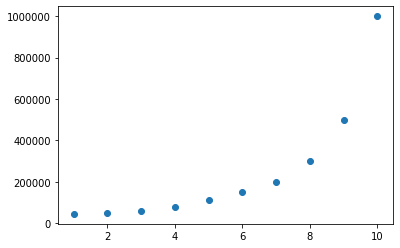

In [12]:
plt.scatter(x,y)

In [14]:
x

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [31]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=3)
x_poly=poly.fit_transform(x)
x_poly                  # y= a0+a1x+a2x^2+a3x^3

array([[   1.,    1.,    1.,    1.],
       [   1.,    2.,    4.,    8.],
       [   1.,    3.,    9.,   27.],
       [   1.,    4.,   16.,   64.],
       [   1.,    5.,   25.,  125.],
       [   1.,    6.,   36.,  216.],
       [   1.,    7.,   49.,  343.],
       [   1.,    8.,   64.,  512.],
       [   1.,    9.,   81.,  729.],
       [   1.,   10.,  100., 1000.]])

In [32]:
x_poly.shape

(10, 4)

In [33]:
from sklearn.linear_model import LinearRegression
pr=LinearRegression()
pr.fit(x_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
y_pred=pr.predict(x_poly)
y_pred

array([ 14902.0979021 ,  78759.9067599 ,  94960.37296037,  88223.77622377,
        83270.39627039, 104820.51282051, 177594.40559441, 326312.35431236,
       575694.63869464, 950461.53846154])

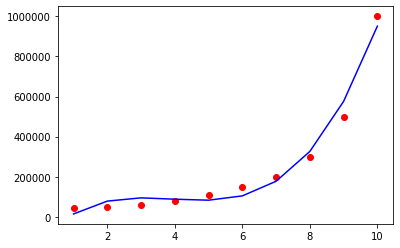

In [35]:
plt.scatter(x,y,color='red')
plt.plot(x,y_pred,color='blue')
plt.show()

In [41]:
pr.predict(poly.fit_transform([[11]]))

array([1475333.33333332])

In [44]:
pr.predict([[1,11,121,1331]])

array([1475333.33333332])

In [42]:
from sklearn.metrics import r2_score
r2_score(y,y_pred)

0.9812097727913367